# 이미지 처리

## numpy

In [1]:
import numpy as np

- 단일 객체 저장 불러오기

In [2]:
#array 생성
array = np.arange(0, 10)
print(array)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
#numpy 형태로 저장
np.save('save.npy',array)

In [4]:
result = np.load('../data/save.npy')
result

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- 복수 객체 저장 불러오기

In [5]:
#복수 array 생성
array01 = np.arange(0,10)
array02 = np.arange(10,20)
array03 = np.arange(20,30)


In [6]:
#np 저장
np.savez('../data/multi-save.npz', a=array01, b=array02, c=array03)

In [7]:
data = np.load('../data/multi-save.npz')

result1 = data['a']
result2 = data['b']

print(result1, '\n', result2)

[0 1 2 3 4 5 6 7 8 9] 
 [10 11 12 13 14 15 16 17 18 19]


- 원소 정렬

In [8]:
#내림차순
result[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [9]:
#행/열 기준으로 정렬
np.random.seed(42)
array = np.random.randint(10, size=(5,4))
print(array)

[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]
 [7 2 5 4]
 [1 7 5 1]]


In [10]:
#열 기준 정렬
print("전 \n", array)
array.sort(axis=0)
print("열 기준 정렬 후\n", array)

전 
 [[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]
 [7 2 5 4]
 [1 7 5 1]]
열 기준 정렬 후
 [[1 2 2 1]
 [6 3 3 4]
 [6 4 5 4]
 [7 7 5 6]
 [7 9 7 7]]


In [11]:
#행 기준 정렬
print("전 \n", array)
array.sort(axis=1)
print("행 기준 정렬 후\n", array)

전 
 [[1 2 2 1]
 [6 3 3 4]
 [6 4 5 4]
 [7 7 5 6]
 [7 9 7 7]]
행 기준 정렬 후
 [[1 1 2 2]
 [3 3 4 6]
 [4 4 5 6]
 [5 6 7 7]
 [7 7 7 9]]


- 배열 더하기합치기

In [12]:
#배열 더하기
print(result1)
print(result2)

sum = result1 + result2
print(sum)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18 20 22 24 26 28]


In [13]:
#배열 합치기
result3 = np.concatenate((result1,result2), axis=0)
print(result3)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


- 배열 인덱싱/슬라이싱

## Numpy와 이미지처리

- Numpy로 이미지 저장

In [14]:
import cv2   #!pip install opencv-python
from matplotlib import pyplot as plt

#import tensorflow as tf

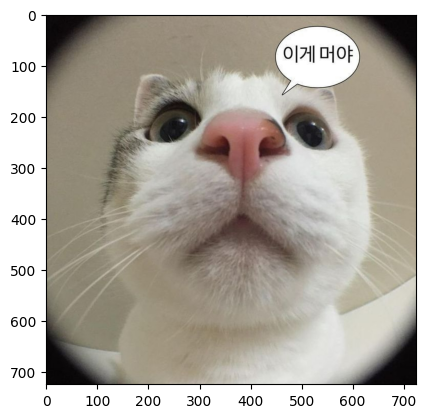

In [15]:
img = cv2.imread('../data/cattt.png')
#resize = tf

#색상 문제 발생 BRG -> RGB converter
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

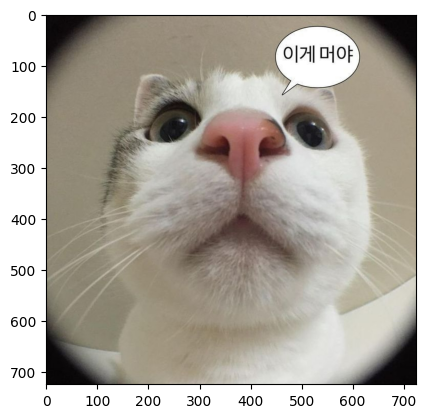

In [16]:
#numpy array로 저장
np.save('../data/image.npy', img)

img_data = np.load('../data/image.npy')
plt.imshow(img_data)
plt.show()

- PIL 이미지 저장시 효율적이다

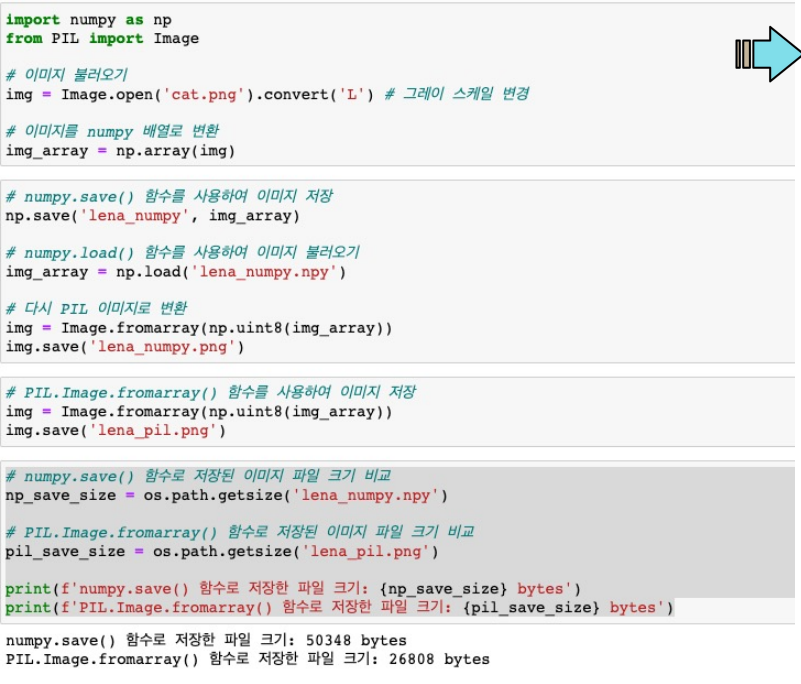

In [17]:
from PIL import Image



- 이미지 타입/크기 확인

In [1]:
img_path = '../data/cattt.png'

#read image
image = cv2.imread(img_path)

#img type
image_type = type(image)
print('type: ',image_type)

#img size
image_height, image_width, image_channe = image.shape
print("image info: ",image_height, image_width, image_channe)

NameError: name 'cv2' is not defined

- 이미지 크기변경 resize/crop

In [19]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
def image_compare(img,str):
    #원본
    plt.imshow(image)
    plt.title("Original")
    plt.show()

    #작업후
    plt.imshow(img)
    plt.title(str)
    plt.show()

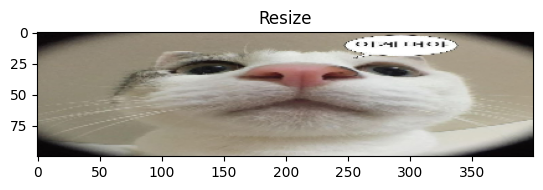

In [21]:
#이미지 사이즈 조정

image_resize = cv2.resize(image, (400,100))
plt.imshow(image_resize)
plt.title('Resize')
plt.show()

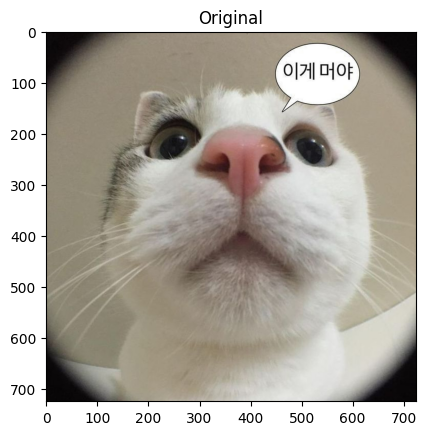

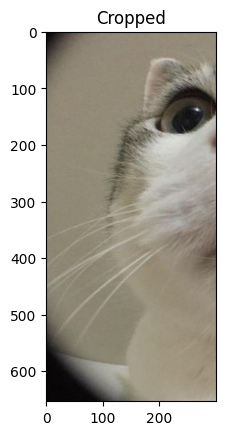

In [22]:
#이미지 크롭
# [start: end : step]
image_cropped = image[70:,:300]

image_compare(image_cropped, 'Cropped')


- 이미지 블러처리

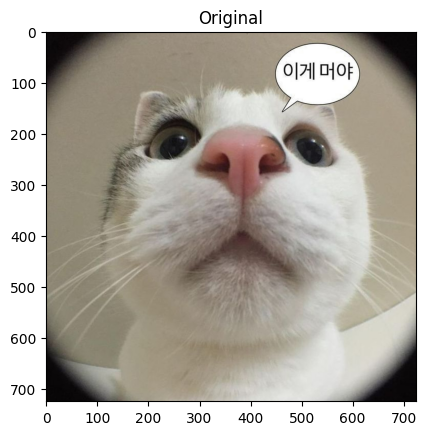

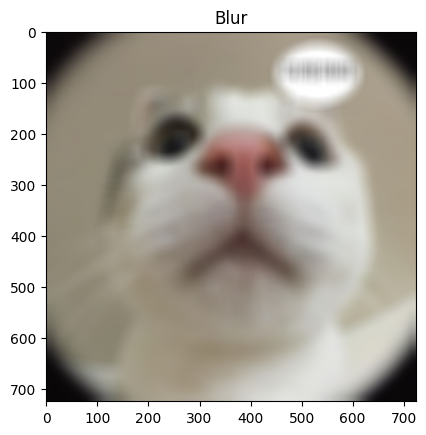

In [23]:
image_blurry = cv2.blur(image, (30,30))

image_compare(image_blurry, 'Blur')

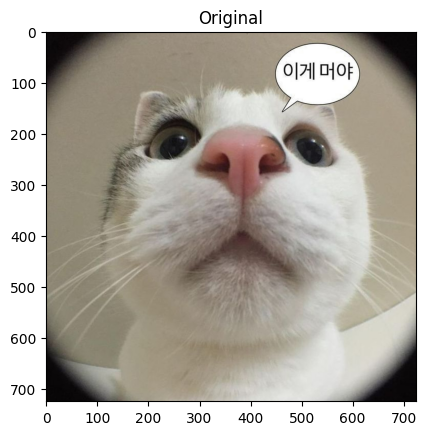

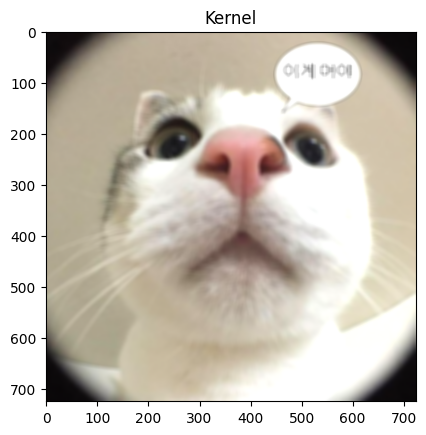

In [24]:
#kernel사용

#kernel 생성
kernel = np.ones((10,10)) / 80.0    #모두 더하면 1이 되도록 정규화

image_kernel = cv2.filter2D(image, -1, kernel)

image_compare(image_kernel, 'Kernel')

In [25]:
kernel

array([[0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125],
       [0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125,
        0.0125, 0.0125]])

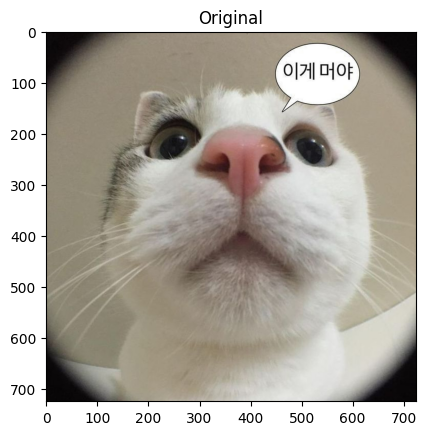

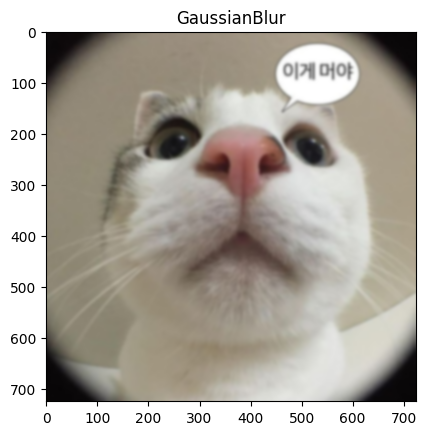

In [26]:
#Gaussian Blur

image_gaussianBlur = cv2.GaussianBlur(image, (15,15),0)

image_compare(image_gaussianBlur, 'GaussianBlur')

- 이미지 필터(선명하게, 대비, 이진화)

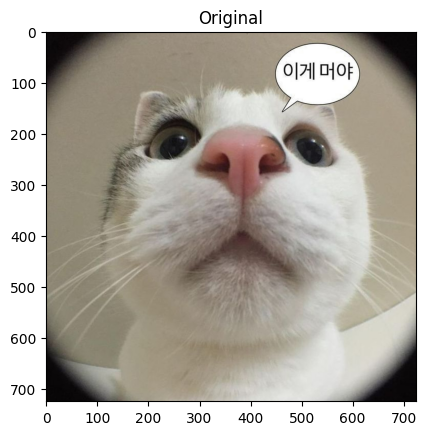

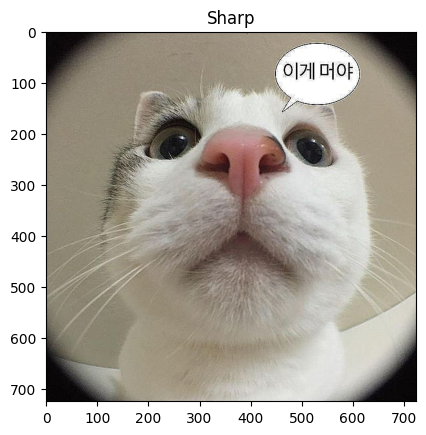

In [27]:
#선명하게

kernel = np.array([[0,-1,-0],
                  [-1,5,-1],
                  [0,-1,0]])

image_sharp = cv2.filter2D(image, -1, kernel)

image_compare(image_sharp, 'Sharp')

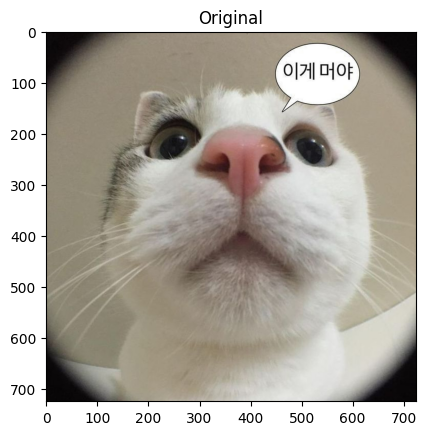

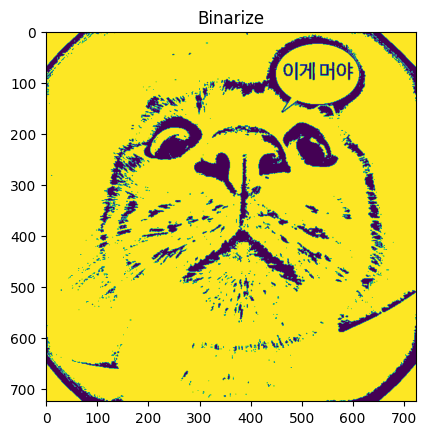

In [28]:
#이진화
image_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
MAX_OUTPUT_VALUE = 225   #출력 픽셀 강도의 최대값
NEIGhBORHOOD_SIZE = 99
SUBTRACT_FROM_MEAN = 10

image_binarized = cv2.adaptiveThreshold(image_gray,
                                        MAX_OUTPUT_VALUE,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        NEIGhBORHOOD_SIZE,
                                        SUBTRACT_FROM_MEAN)

image_compare(image_binarized,"Binarize")

- 이미지 회전

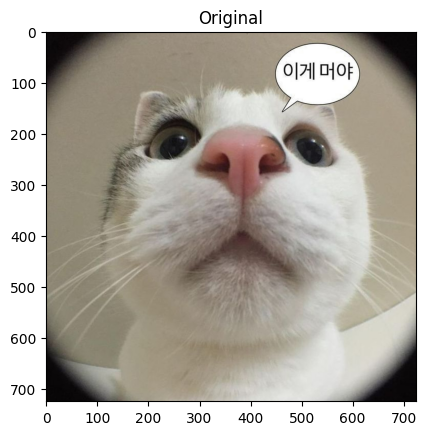

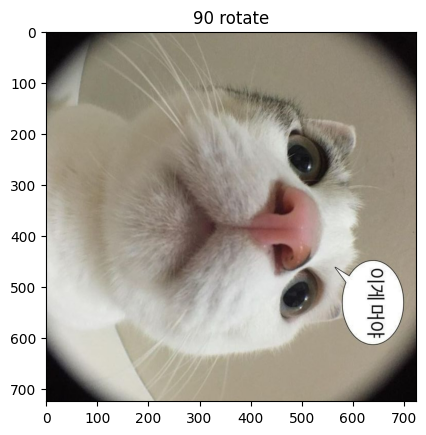

In [29]:
image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image_180 = cv2.rotate(image, cv2.ROTATE_180)

image_compare(image_90, '90 rotate')

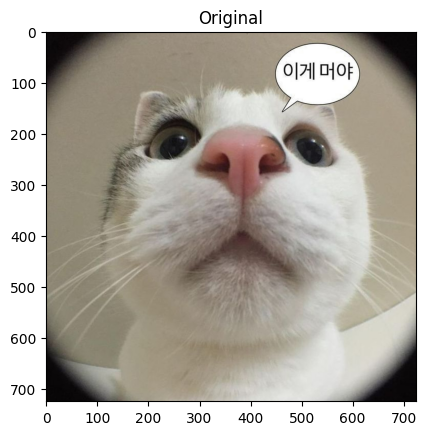

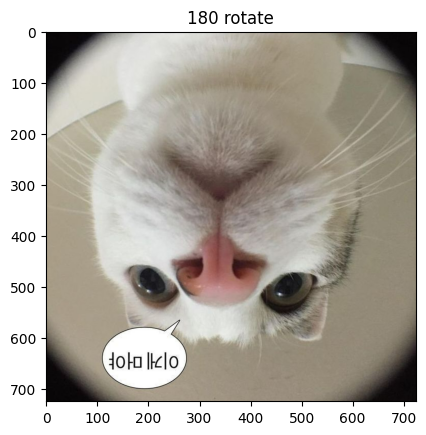

In [30]:
image_compare(image_180,'180 rotate')

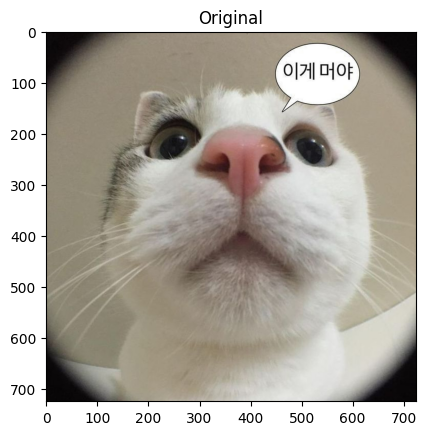

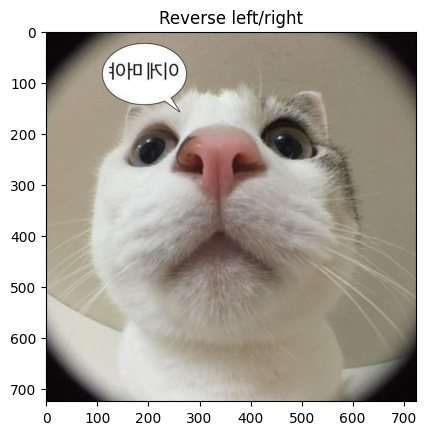

In [31]:
#상하 좌우 반전

dst_1 = cv2.flip(image, 1)       #1은 좌우반전
dst_0 = cv2.flip(image, 0)       #0은 상하 반전

image_compare(dst_1,"Reverse left/right")

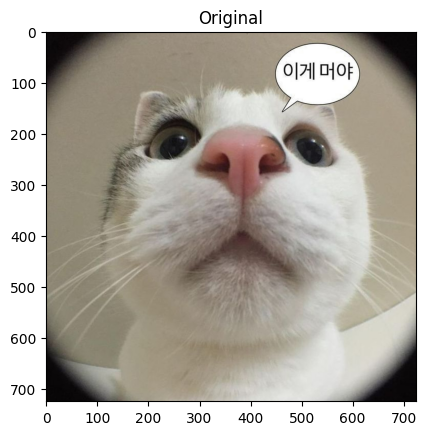

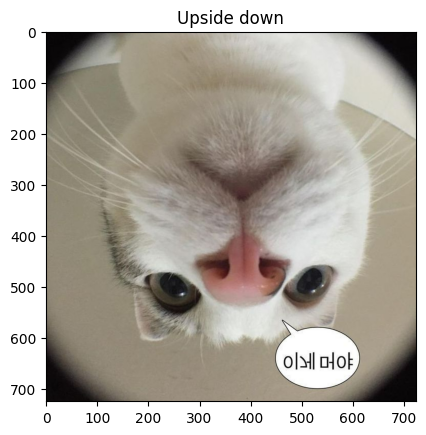

In [32]:
image_compare(dst_0, 'Upside down')

- 배경제거

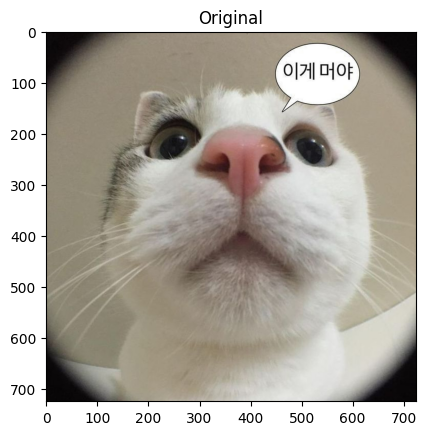

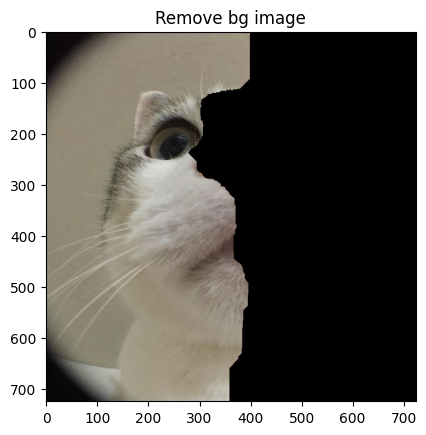

In [33]:
#사각형 좌표
rectangle = (0, 0, 399, 1000)

#초기 마스크 생성
mask = np.zeros(image.shape[:2], np.uint8)

#grapCut에 임시 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

#grabCut 실행
cv2.grabCut(image,
            mask,
            rectangle,
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask ==2) | (mask ==0),0 ,1).astype('uint8')
image_rgb_nobg = image * mask2[:,:,np.newaxis]

image_compare(image_rgb_nobg,'Remove bg image')

- 경계선 감지

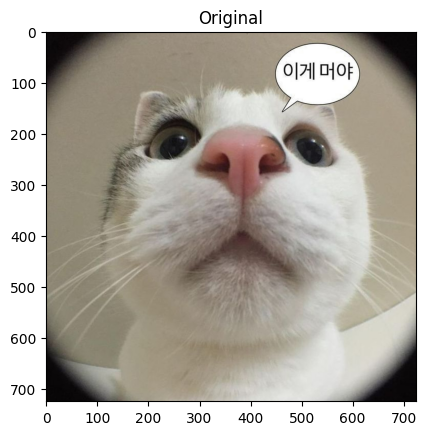

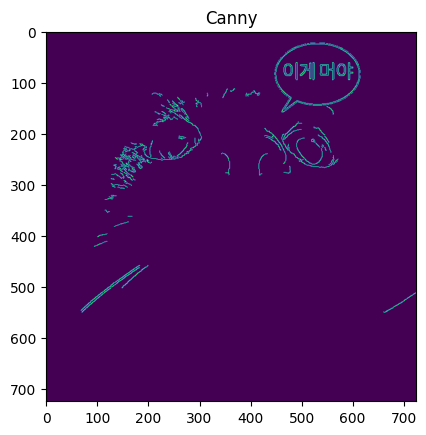

In [34]:
#1. 픽셀 강도의 중간값 계산
median_intensity = np.median(image_gray)

#2. 중간 픽셀에서 위 아래 1 표준편차 떨어진 값 임계값 지정
#0.33을 중간 강도에서 뺀 후. 0과의 최댓값 취함. 하한값은 0 미만 설정/상한값 225초과 설정
lower_threshold = int(max(0,(1.0 - 0.33)* median_intensity))
upper_threshold = int(min(225,(1.0+0.33) * median_intensity))

image_canny = cv2.Canny(image, lower_threshold, upper_threshold)

image_compare(image_canny, "Canny")

- 모서리 감지 Harris

In [35]:
#모서리 감지는 grayscale로 바꿔줘야함

In [36]:
box_img = cv2.imread('../data/box.png', cv2.COLOR_BGR2RGB)
box_img_gray = cv2.imread('../data/box.png', cv2.IMREAD_GRAYSCALE)

#모서리 감지 매개변수
BLOCK_SIZE = 4
APERTURE = 29
FREE_PARAMETER = 0.04

detector_response = cv2.cornerHarris(box_img_gray,
                                     BLOCK_SIZE,
                                     APERTURE,
                                     FREE_PARAMETER)

print(detector_response)

[[ 8.6615752e+15  8.6615752e+15  1.7806977e+16 ... -1.1735742e+13
  -1.5615080e+13 -1.8001269e+13]
 [ 8.6615752e+15  8.6615752e+15  1.7806977e+16 ... -1.1735742e+13
  -1.5615080e+13 -1.8001269e+13]
 [ 1.6070471e+16  1.6070471e+16  3.0130905e+16 ... -2.3467903e+14
  -3.0662265e+14 -3.5124833e+14]
 ...
 [ 6.5157558e+15  6.5157558e+15  9.9365099e+15 ... -2.1313231e+00
  -1.8434470e+00 -1.6917827e+00]
 [ 4.6069135e+15  4.6069135e+15  7.1873921e+15 ... -4.5563650e+00
  -4.5567064e+00 -4.5570168e+00]
 [ 3.3108657e+15  3.3108657e+15  5.1404472e+15 ... -4.5766296e+00
  -4.5766730e+00 -4.5767150e+00]]


2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.6057568151919307e+24
2.605756815

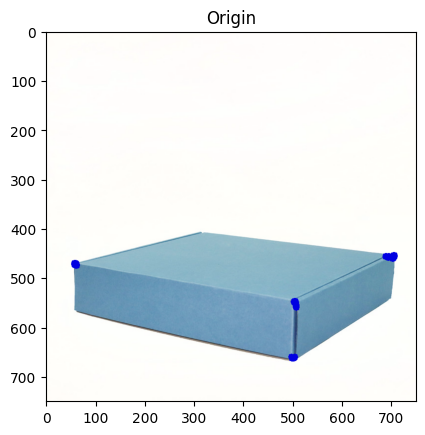

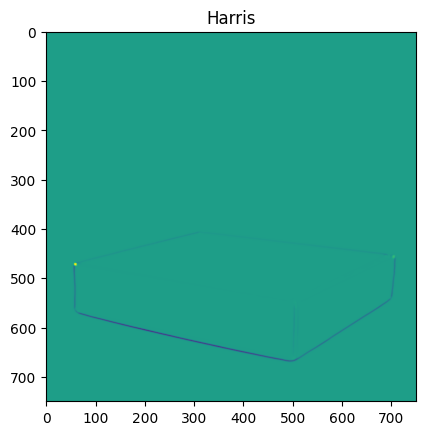

In [37]:
#모서리 표시 부각
detector_response = cv2.dilate(detector_response, None)

#임계값보다 큰 결과만 남기고 나머지 버림
threshold = 0.01
for i in range(detector_response.shape[0]):
    for j in range(detector_response.shape[1]):
        if detector_response[i,j] > threshold* detector_response.max():
            print(threshold*detector_response.max())
            cv2.circle(box_img, [j,i], radius=5, color=(0,0,225))
            #i행(y), j열(x)

plt.imshow(box_img)
plt.title('Origin')
plt.show()

plt.imshow(detector_response)
plt.title('Harris')
plt.show()

- 머신러닝 특성 만들기